# My First Univariate Linear Regression


##### Dataset from: https://www.kaggle.com/andonians/random-linear-regression
##### NoteBook by: [iArunava](https://github.com/iArunava)

## Introduction

This project is my first creating a univariate linear regression model. And in general, my first project :)

The Dataset is collected so as it is best suited for a univariate linear regression model.

That is all, its a quite simple project.

So, lets get Started!!

## Libraries Required

1) _Numpy_: NumPy is the fundamental package for scientific computing with Python.

2) _Pandas_: Pandas is an easy-to-use data structures and data analysis tools for the Python programming language.

3) _Matplotlib_: Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

## Goal of the project

Create a Univariate Linear Regression Model **without the use of any readily available libraries.**

To get a better understanding of how the algorithm works under the hood.

### Step 1:

Get the Dataset. Its important to notice that the dataset is really small and, thus, is confirmed that there are no missing values. So, no data cleaning is done and the data is considered to be good for the goal of this project.

**Note**: The process of dividing the data into test and training set is already done by the creator of the dataset.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Getting the training and test data
df_test  = pd.read_csv('./DataSet/test.csv') 
df_train = pd.read_csv('./DataSet/train.csv')


# Separating the training and test datasets into 'X' and 'Y' (i.e the features and output)
xtrain = df_train.iloc[:, 0]
ytrain = df_train.iloc[:, 1]

xtest = df_test.iloc[:, 0]
ytest = df_test.iloc[:, 1]


# Performing feature normalization (Min-Max Standardization)
xtrain /= (xtrain.max() - xtrain.min())
ytrain /= (ytrain.max() - ytrain.min())

# Adding the bias unit to the xtrain and xtest
xtrain = pd.concat([pd.Series(np.ones(len(xtrain))), xtrain], axis=1)
xtest  = pd.concat([pd.Series(np.ones(len(xtrain))), xtest], axis=1)

# Getting just the features without the bias unit
xtr = xtrain.iloc[:, 1]
xte = xtest.iloc[:, 1]

### Step 2:

So, now we have features 'X' and response 'Y' for the training data and the test data.
Next, lets randomly choose a hypothesis and lets train it! **Exciting !!**

In [3]:
hypo = np.random.randn(2, 1)

Before starting to train the model, lets see what the initial cost is for the randomly chosen hypothesis.

**Note:** We are going to calculate SSE (Sum of Squared Errors) and provide the Accuracy percentage (for the randomly chosen hypothesis.

Lets have a look at the formula used for calculating the cost function.

In [4]:
%%latex
\begin{align}
J(\Theta) = \frac{1}{2 \times m} \times \sum_{i=1}^m ( h_{\Theta}(x^{(i)}) - y^{(i)})^{2}
\end{align}

<IPython.core.display.Latex object>

Initial Cost: 0.04218860270292831


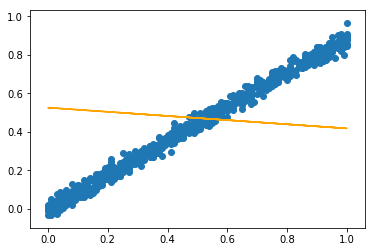

In [5]:
# Cost Function
def get_hypo(x, hypo):
    return x.dot(hypo).iloc[:, 0]

def cost_function(x, y, hypo):
    cost = (((get_hypo(x, hypo) - y)**2).sum()) * (1/(2*len(x)))
    return cost

def plot_fit_line():
    f = lambda a : a.dot(hypo)
    plt.scatter(xtr, ytrain)
    plt.plot(xtr, f(xtrain), c='orange')
    plt.show()
    
print ('Initial Cost: ' + str(cost_function(xtrain, ytrain, hypo)))
plot_fit_line()

So, that is how it seems initially.

Now, as this is a practice work. I will try different learning rates to see how things work out.

All righty then, lets get started by declaring all the essential functions that will be requried.

So, for optimizing the model we will be using Gradient Descent.

Let's have a look at the formula used for gradient descent.

In [6]:
%%latex
\begin{align}
\Theta_{j} = \Theta_{j} - \alpha \frac{1}{m}\sum_{i=1}^m ( h_{\Theta}(x^{(i)}) - y^{(i)} ) x_{j}^{(i)}
\end{align}

<IPython.core.display.Latex object>

This is to be performed for all `j` where `j` is a feature.

So, lets code it up!

In [7]:
# Derivative of the cost function
def f_cost_func(x, y, hypo, j, ALPHA):
    return (((get_hypo(x, hypo) - y) * x.iloc[:, j]).sum()) * (1.0/len(x)) * ALPHA

# Gradient Descent
def gradient_descent(iter_num, alpha, reset_hypo=False):
    '''
    Passing just `iter_num` rest is read from the global variables
    '''
    if reset_hypo: # If `reset_hypo` is true, then the model is reset to a random
        hypo = np.random.randn(2, 1)
        
    ALPHA = alpha # Learning Rate
    for j in range(iter_num):
        for i in range(len(hypo)):
            t_hypo = hypo
            hypo[i] -= f_cost_func(xtrain, ytrain, t_hypo, i, ALPHA)
        plt.plot(j, cost_function(xtrain, ytrain, hypo), 'bo')
    plt.show()
    
    return hypo

Now, as I said, I will be testing with different learning rates. So, below I do three tests.

**Note:** I have a `reset_hypo` parameter in `gradient_descent()` which if true resets the model. You can use that, and play around with different learning rates.

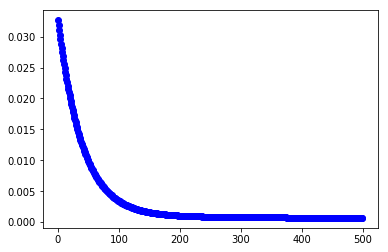

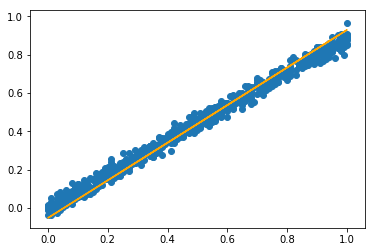

Initial Cost: 0.0006756583959542517


In [8]:
# Testing with Learning Rate = 0.01
hypo = gradient_descent(500, 0.01, True)
plot_fit_line()
print ('Initial Cost: ' + str(cost_function(xtrain, ytrain, hypo)))

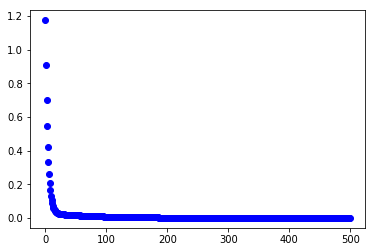

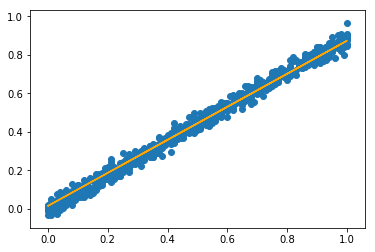

Initial Cost: 0.00034665438923689776


In [9]:
# Testing with Learning Rate = 0.1
hypo = gradient_descent(500, 0.1, True)
plot_fit_line()
print ('Initial Cost: ' + str(cost_function(xtrain, ytrain, hypo)))

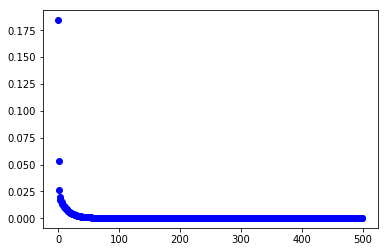

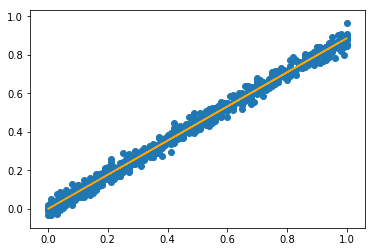

Initial Cost: 0.0003104872120327698


In [10]:
# Testing with Learning Rate = 0.5
hypo = gradient_descent(500, 0.5, True)
plot_fit_line()
print ('Initial Cost: ' + str(cost_function(xtrain, ytrain, hypo)))

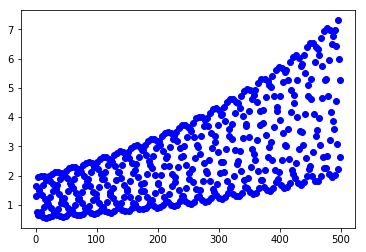

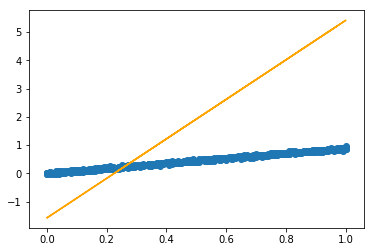

Initial Cost: 2.647717853115317


In [11]:
# Testing with Learning Rate = 4
hypo = gradient_descent(500, 4, True)
plot_fit_line()
print ('Initial Cost: ' + str(cost_function(xtrain, ytrain, hypo)))

There you go!!!

Model trained!!!

**Things to Notice:**

_**1)**_ Larger Learning Rate causes faster divergence

_**2)**_ Too much larger rate causes one to overshoot the minima and as can be seen from the above example which uses learning rate as `4`, that the cost increases and decreases alternatively. You can try with much larger rates, and see that the cost increases each iteration.

_**3)**_ Smaller learning rates, on the other hand converges alright if a convinient number of iterations are used and it takes time.

_**4)**_ With too small learning rates, one might never reach the global optima (Well one would for sure, with many more iterations)

<hr/>

Finally, lets train the model with learning rate = `0.5`

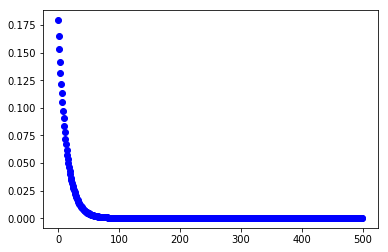


Hypothesis: 
[[-0.00106604]
 [ 0.88791059]]


In [12]:
hypo = gradient_descent(500, 0.5, True)
print ('\nHypothesis: \n' + str(hypo))

### Step 3:

With this, lets see the accuaracy of our model on the test data.

In [21]:
# Accuarcy %
print ('Accuracy : ' + str(100 - (((ytest - xtest.dot(hypo).iloc[:, 0]) / ytest) *100).mean()) + '%')

Accuracy : 89.22284928662384%


Well Well Well!!

We got a accuracy of `89.22%`.

Which is not bad!

## Conclusion

This is how we create a univariate linear regression model.

The data was generated randomly, for univariate linear regression purposes. So, cannot conclude anything specific.

In brief, had too much fun creating my first univariate linear regression model.